# Trabajo Computacional 3

In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.colors
import numpy as np
from  collections  import defaultdict
from scipy import optimize
import os
from lectura import ldata
import community
import rpy2.robjects as robjects

ImportError: No module named 'community'

In [ ]:
# El directorio que vamos a usar en cada lectura de datos de ahora en mas
directorio = os.path.dirname(os.path.realpath("dolphins.txt"))

In [62]:
fnDOL = os.path.join(directorio,'dolphins.gml')
delfines = nx.read_gml(fnDOL)
generos=ldata('dolphinsGender.txt')

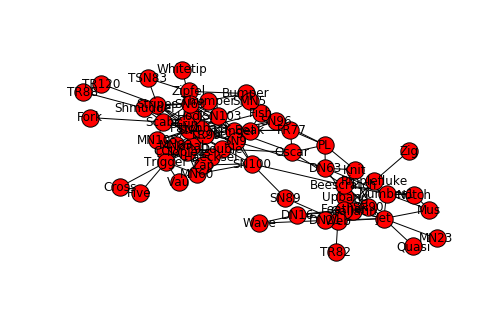

In [63]:
nx.draw(delfines, with_labels=True)
plt.show()

In [64]:
#delfines.edges

Encuentre la partición en clusters de esta red utilizando la metodología Louvain, infomap,fast_greedy y edge_betweenness. Visualice los resultados gráficamente.

In [65]:
def community(nxG, algorithm, fig_name = "G"):
    """
    In:
        nxG: grafo de networkx.
        algorithm: string, entre las siguientes opciones: 
            fast_greedy
            edge_betweenness
            louvain
            infomap
        fig_name: nombre de la figura que se genera al clsuterizar. Le agrega automaticamente el nombre del algoritmo usado y el nombre del grafo si lo tuviere
    Out:
        labels: numpy array con la pertenencia de cada nodo al cluster.
    
    """
    gml_file_name = "G.gml"
    fig_name += "_"+nxG.name+"_"+algorithm+".svg"
    nx.write_gml(nxG, gml_file_name)
    
    igG = robjects.r('''
        f <- function(file, algorithm, fig_name){
            require("igraph")     
            
            G <- read_graph(file, "gml")
            #format = c("edgelist", "pajek", "ncol", "lgl", "graphml","dimacs", "graphdb", "gml", "dl"), ...)
            
            if(algorithm == "fast_greedy"){
                c <- cluster_fast_greedy(G, 
                    merges = TRUE, 
                    modularity = TRUE, 
                    membership = TRUE)
            }
            
            if(algorithm == "edge_betweenness"){
                c <- cluster_edge_betweenness(G,directed = FALSE,edge.betweenness = TRUE)
            }
            
            if(algorithm == "louvain"){
                c <- cluster_louvain(G)
            }
            
            if(algorithm == "infomap"){
                c <- cluster_infomap(G)
            }
            
            svg(fig_name)
            plot(c, G)
            dev.off()
            
            return(membership(c))
        }
    ''')
    
    labels = igG(gml_file_name, algorithm, fig_name)
    os.remove(gml_file_name)
    return np.array(labels)

In [66]:
labels_fastgreedy = community(delfines,"fast_greedy")
labels_bet = community(delfines,"edge_betweenness")
labels_louvian = community(delfines,"louvain")
labels_infomap = community(delfines,"infomap")

In [82]:
labels_fastgreedy 

array([ 1.,  1.,  2.,  2.,  2.,  2.,  2.,  1.,  3.,  2.,  4.,  4.,  4.,
        1.,  4.,  1.,  3.,  3.,  1.,  2.,  2.,  2.,  3.,  4.,  1.,  1.,
        4.,  1.,  1.,  2.,  1.,  4.,  5.,  2.,  2.,  2.,  4.,  4.,  1.,
        4.,  4.,  2.,  4.,  4.,  2.,  1.,  2.,  2.,  3.,  3.,  2.,  1.,
        4.,  5.,  2.,  4.,  2.,  1.,  1.,  2.,  3.,  2.])

dict_values([1.0, 3.0, 2.0, 2.0, 2.0, 3.0, 2.0, 1.0, 3.0, 2.0, 4.0, 4.0, 4.0, 1.0, 5.0, 4.0, 3.0, 3.0, 1.0, 2.0, 2.0, 2.0, 3.0, 4.0, 1.0, 1.0, 4.0, 1.0, 1.0, 4.0, 1.0, 1.0, 2.0, 2.0, 4.0, 1.0, 4.0, 5.0, 2.0, 2.0, 4.0, 2.0, 4.0, 4.0, 1.0, 2.0, 2.0, 2.0, 2.0, 2.0, 1.0, 1.0, 2.0, 4.0, 4.0, 2.0, 1.0, 1.0, 2.0, 4.0, 3.0, 2.0])


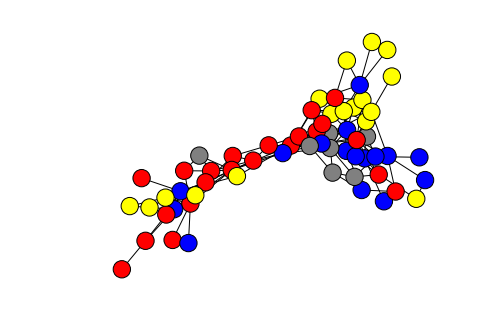

In [81]:
comunidades = dict()

for d,i in zip(delfines,labels_fastgreedy):
    comunidades[d]=i
    
nx.set_node_attributes(delfines, comunidades, 'labels_fastgreedy')
nx.draw(delfines,node_color=["blue" if g==1.0 else "red" if g==2.0 else "grey" if g==3.0 else "yellow" for g in nx.get_node_attributes(delfines,"labels_fastgreedy").values()],)
print (nx.get_node_attributes(delfines, "labels_fastgreedy").values())

In [34]:
nx.set_node_attributes(delfines, 'labels_fastgreedy', )

·delfines.node[1]['labels_fastgreedy'] 

TypeError: cannot convert dictionary update sequence element #0 to a sequence

In [73]:
bb = nx.betweenness_centrality(delfines)
bb
print (nx.set_node_attributes(delfines,bb, 'labels_fastgreedy'))

None
